## Importar bibliotecas

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import prophet

## Importar base de dados

In [84]:
df_biodiesel = pd.read_csv("/Users/reginaldocunha/Documents/Portfólio de Projetos Data Science/"
                           "Projeto Produção Biodiesel/biodiesel-producao.csv")
df_biodiesel.head()

,Mês/Ano,Região,Produção de Biodiesel
0,06/2023,NORDESTE,49975
1,06/2023,NORTE / CENTRO OESTE,300341
2,06/2023,SUDESTE,29533
3,06/2023,SUL,274958
4,05/2023,NORDESTE,51346


## Visualizacao dos tipos de dados

In [85]:
df_biodiesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mês/Ano                312 non-null    object
 1   Região                 312 non-null    object
 2   Produção de Biodiesel  312 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.4+ KB


In [86]:
#Check the number of unique value on object datatype
df_biodiesel.select_dtypes(include='object').nunique()

Mês/Ano    78
Região      4
dtype: int64

## Tratamento dos dados

In [116]:
#Convert "object" column to datetime
df_biodiesel["Mês/Ano"] = pd.to_datetime(df_biodiesel["Mês/Ano"], format='%m/%Y')

In [117]:
#Quais as Regiões na base de dados
df_biodiesel.Região.unique()

array(['NORDESTE', 'NORTE / CENTRO OESTE', 'SUDESTE', 'SUL'], dtype=object)

In [118]:
#Funcao para criar as siglas das regioes
def sigla_regiao (Região):
    if 'NORDESTE' in Região:
        return 'NE'
    elif 'NORTE / CENTRO OESTE' in Região:
        return 'NCO'
    elif 'SUDESTE' in Região:
        return 'SD'
    elif 'SUL' in Região:
        return 'S'
    else:
        return 'Verify'

In [119]:
#Cria a coluna 'Sigla_Regiao' aplicando a funcao sigla_regiao
df_biodiesel['Sigla_Região'] = df_biodiesel['Região'].apply(sigla_regiao)

In [120]:
#Cria as colunas Mes e Ano
df_biodiesel['Mes'] = df_biodiesel['Mês/Ano'].dt.month
df_biodiesel['Ano'] = df_biodiesel['Mês/Ano'].dt.year
df_biodiesel

,Mês/Ano,Região,Produção de Biodiesel,Sigla_Região,Mes,Ano
0,2023-06-01,NORDESTE,49975,NE,6,2023
1,2023-06-01,NORTE / CENTRO OESTE,300341,NCO,6,2023
2,2023-06-01,SUDESTE,29533,SD,6,2023
3,2023-06-01,SUL,274958,S,6,2023
4,2023-05-01,NORDESTE,51346,NE,5,2023
...,...,...,...,...,...,...
307,2017-02-01,SUL,102263,S,2,2017
308,2017-01-01,NORDESTE,20107,NE,1,2017
309,2017-01-01,NORTE / CENTRO OESTE,103414,NCO,1,2017
310,2017-01-01,SUDESTE,24076,SD,1,2017


## Visualizacao geral dos dados

In [123]:
#Acumular os dados por mes e ano
Prod_MesAno = df_biodiesel.groupby(['Sigla_Região', 'Mes', 'Ano'])['Produção de Biodiesel'].sum().reset_index()
Prod_MesAno
#Prod_MesAno.drop(['Mes'], axis=1, inplace=True) #Excluir coluna Mes de Prod_regiao
#Prod_MesAno.drop(['Ano'], axis=1, inplace=True) #Excluir coluna Ano de Prod_regiao

,Sigla_Região,Mes,Ano,Produção de Biodiesel
0,NCO,1,2017,103414
1,NCO,1,2018,119774
2,NCO,1,2019,182857
3,NCO,1,2020,196995
4,NCO,1,2021,192767
...,...,...,...,...
307,SD,12,2018,42299
308,SD,12,2019,43174
309,SD,12,2020,38388
310,SD,12,2021,32659


/opt/homebrew/Caskroom/miniconda/base/envs/biodiesel/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/biodiesel/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/biodiesel/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/biodiesel/lib/python3.11/site-packages/seaborn/_oldcore.py:111

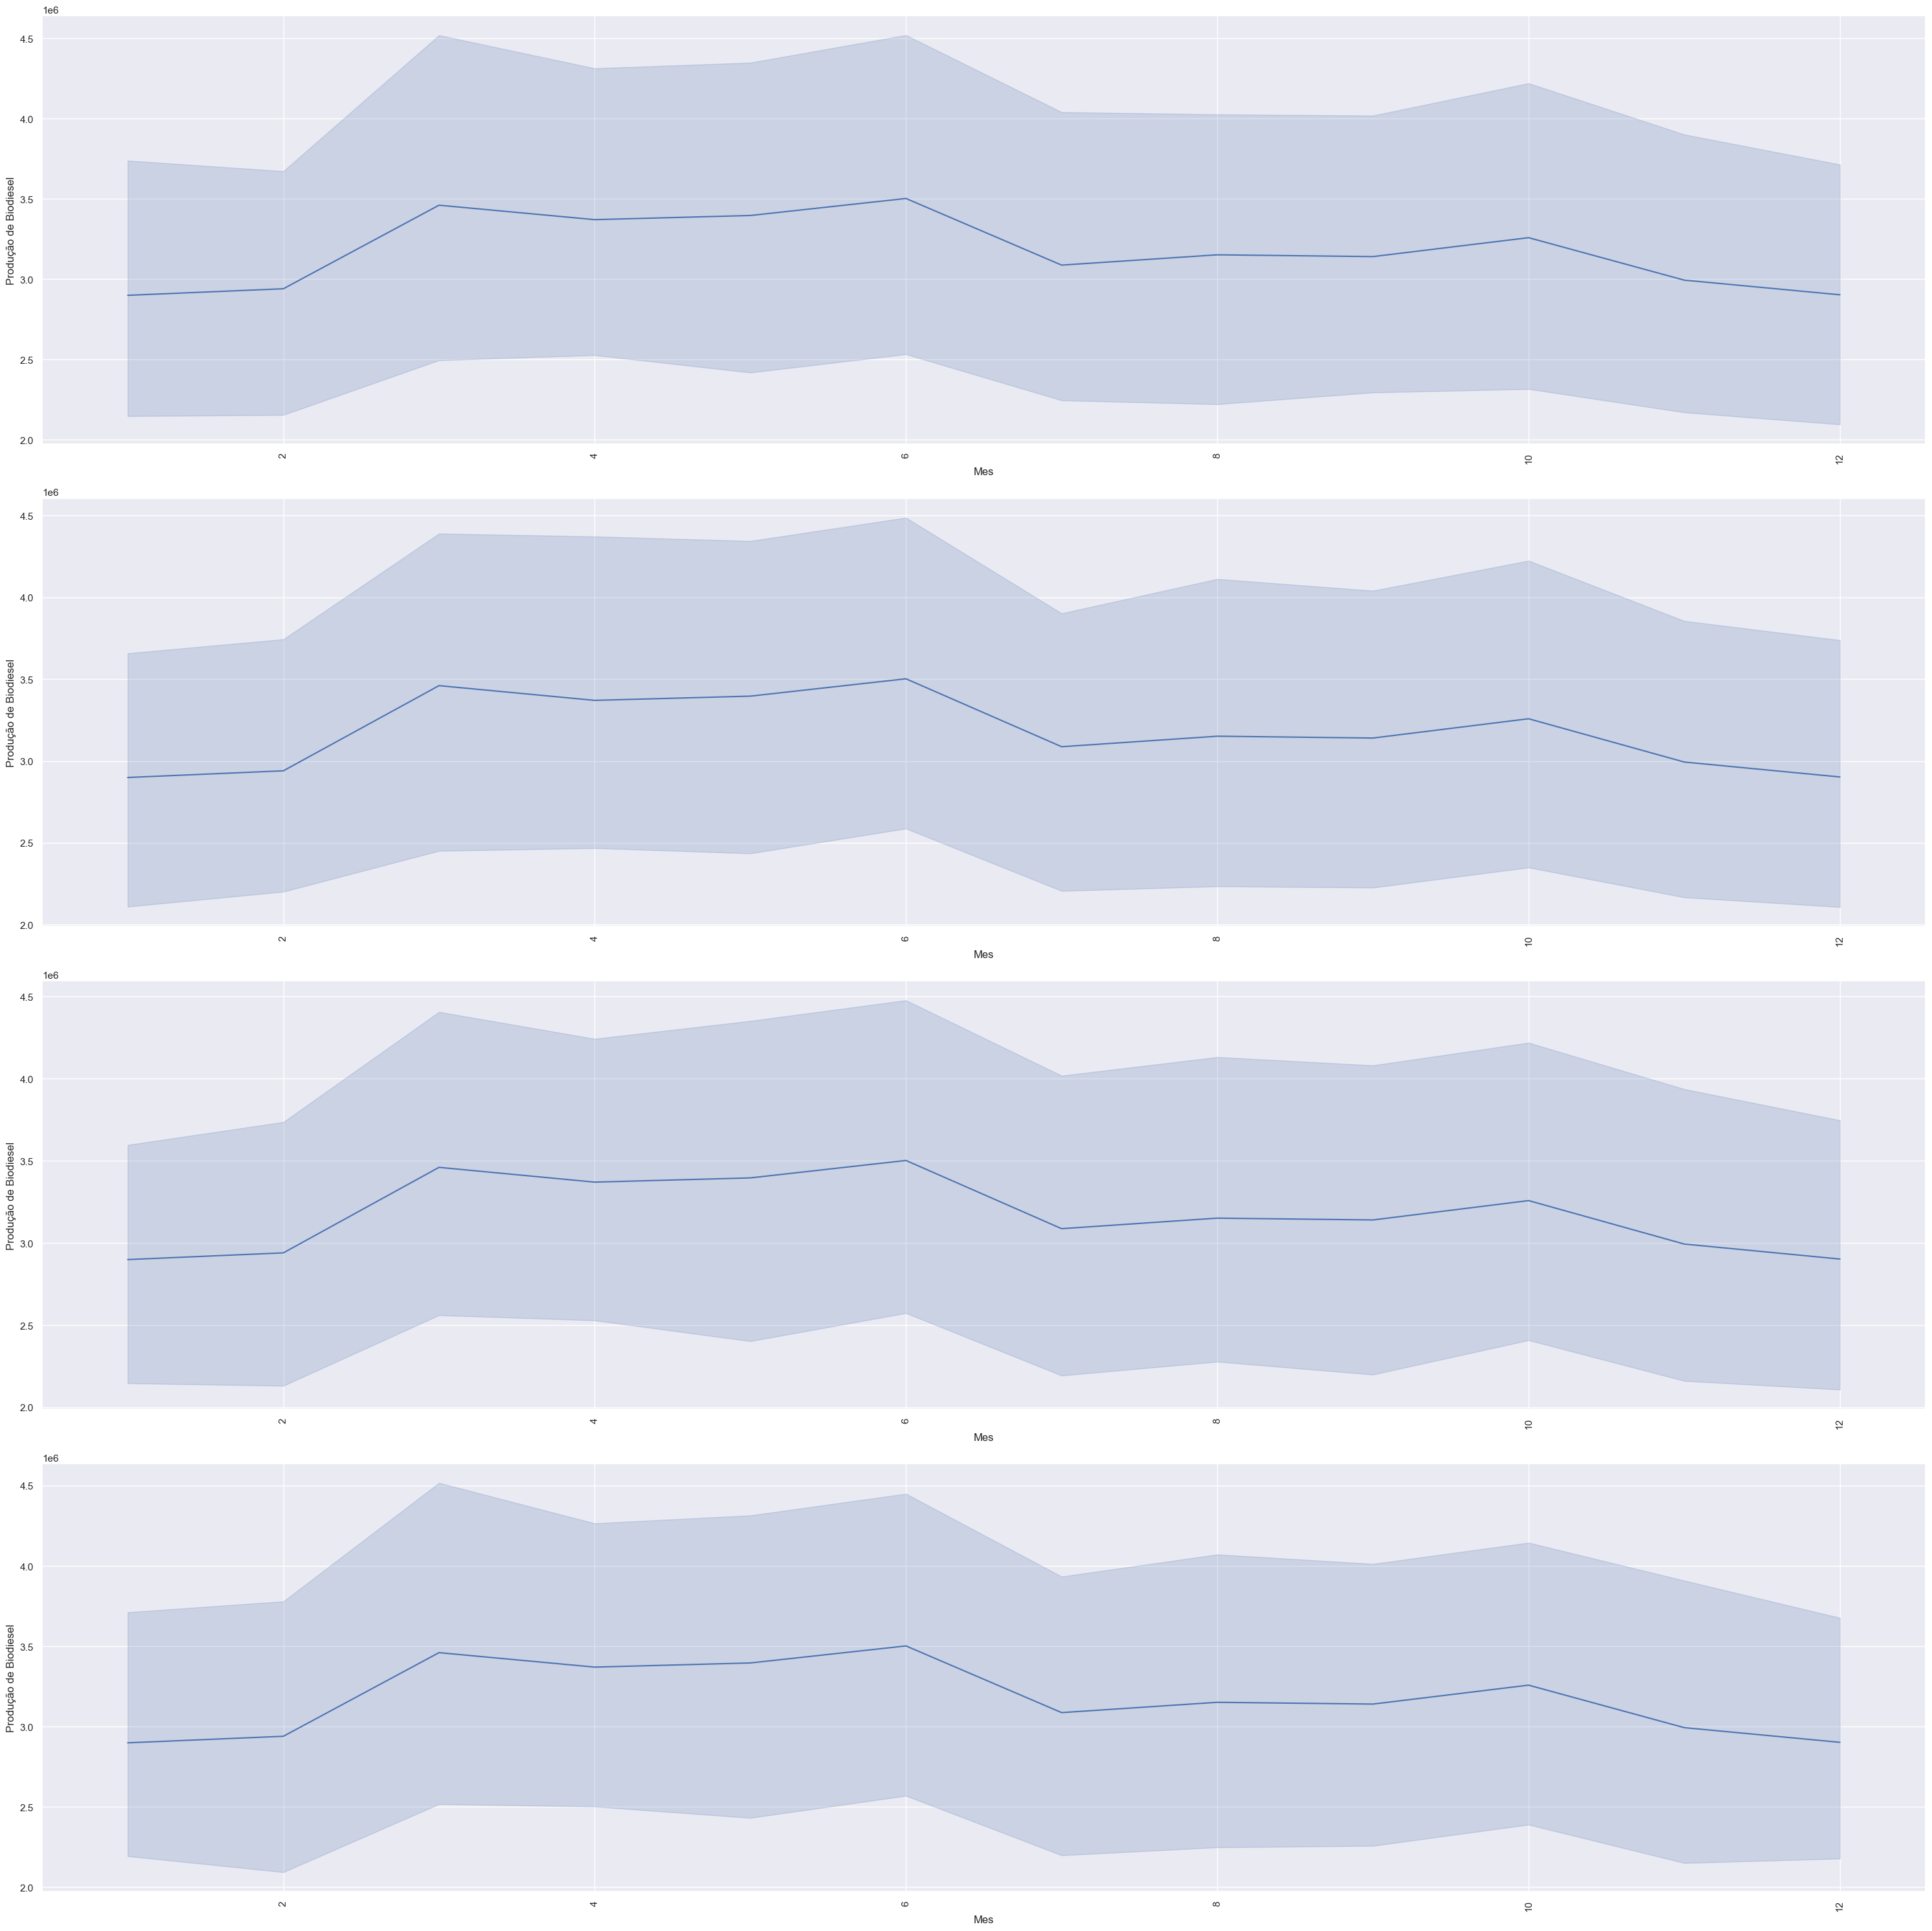

In [130]:
#Lista de Regiões
regioes = ['NE', 'S', 'NCO', 'SD']

#Cria subplots
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(30, 30))
axs = axs.ravel()

#Cria graficos de linha
for i, var in enumerate(regioes):
    sns.lineplot(x='Mes', y='Produção de Biodiesel', data=Prod_MesAno, ax=axs[i], estimator=np.sum)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
#Ajusta espaco entre os graficos
fig.tight_layout()

#Show plot
plt.show()

<Axes: title={'center': 'Producao Mes/Ano'}>

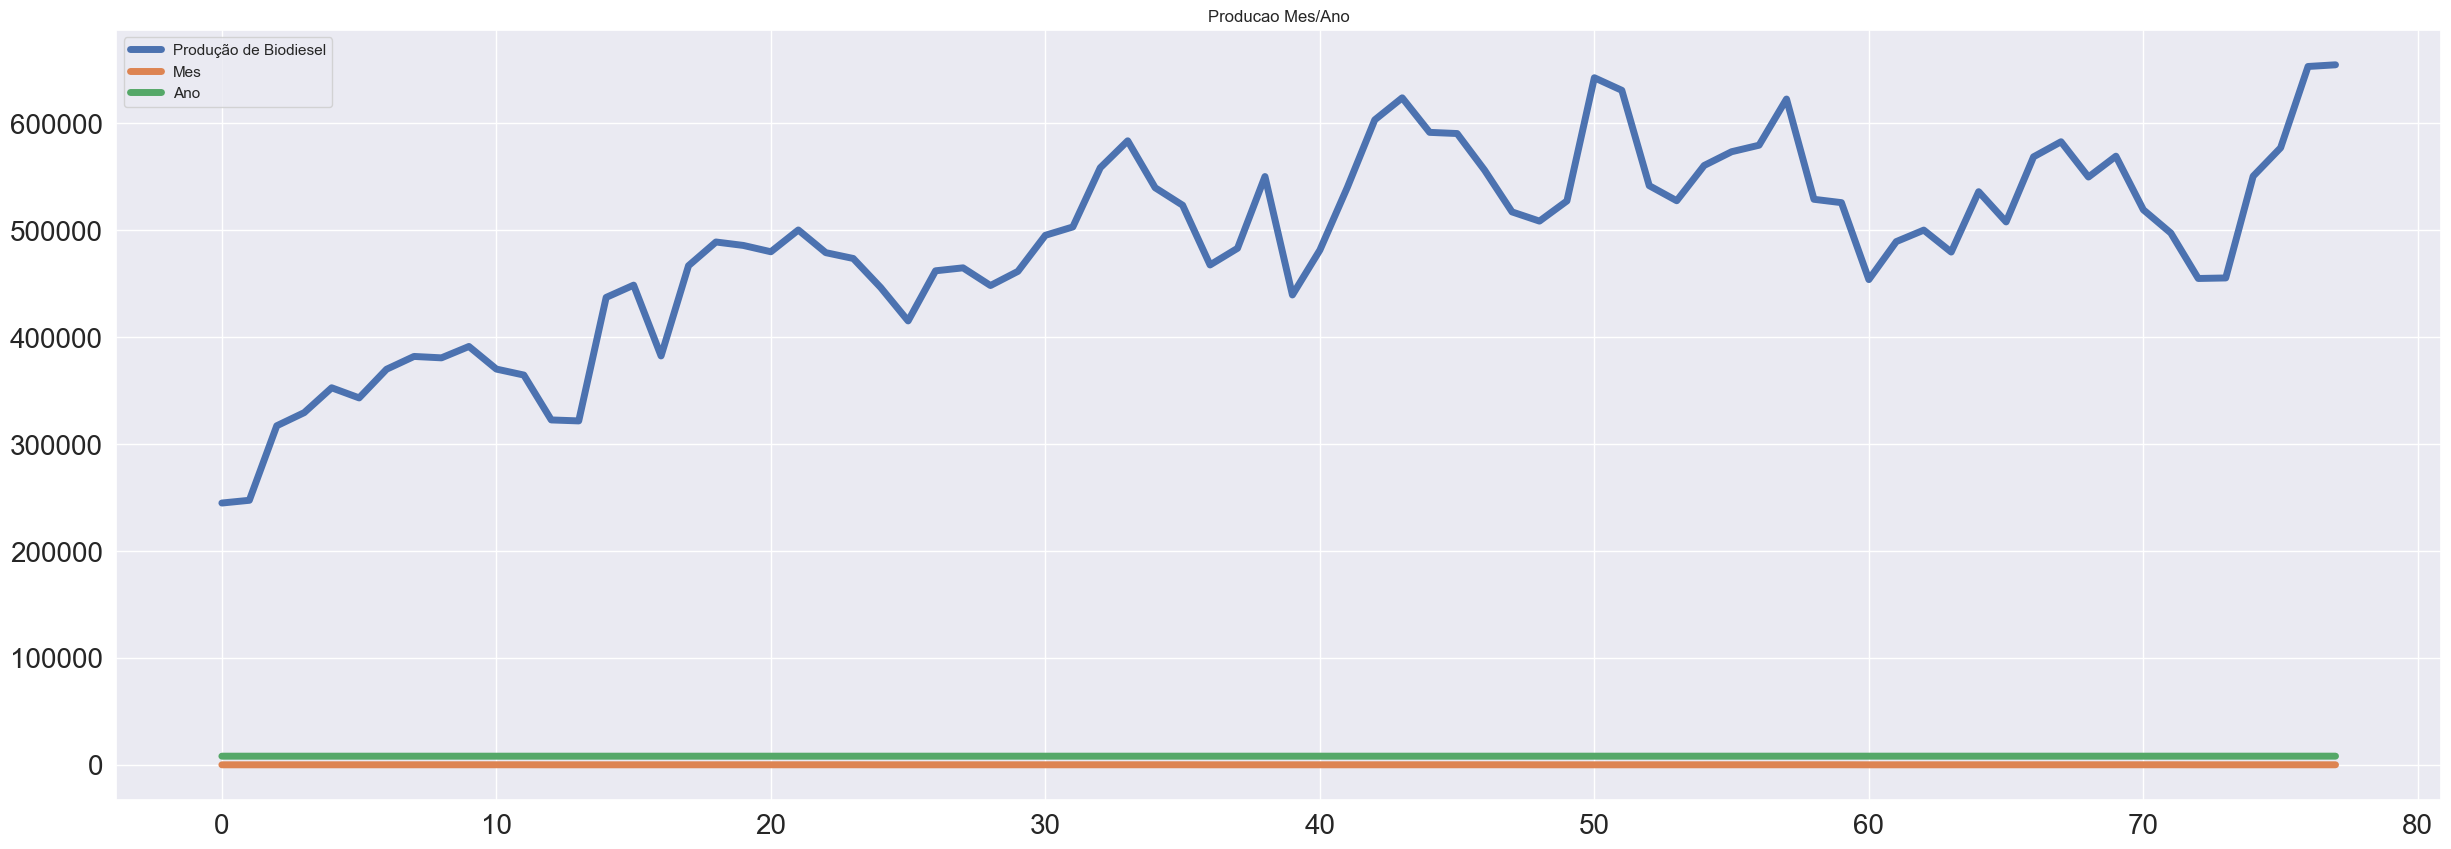

In [106]:
#Visualizacao dos dados acumulados por mes ano
sns.set(rc={'figure.figsize': (200, 30)})
#sns.barplot(data=Prod_MesAno, x='Mês/Ano', y='Produção de Biodiesel')
Prod_MesAno.plot(figsize=(30, 10),
                 linewidth=5,
                 fontsize=20,
                 title='Producao Mes/Ano')

In [107]:
Prod_MesAno_v2 = Prod_MesAno.pivot(index=['Mes'], columns=['Ano'], values='Produção de Biodiesel')
Prod_MesAno_v2

Ano,8068,8072,8076,8080,8084,8088,8092
Mes,,,,,,,
4,244876.0,322608.0,446487.0,467580.0,508589.0,453908.0,454927.0
8,247440.0,321694.0,415230.0,483168.0,527442.0,489435.0,455428.0
12,317151.0,437224.0,462115.0,550280.0,642696.0,500171.0,550588.0
16,329448.0,448687.0,464881.0,439509.0,630937.0,479645.0,577174.0
20,352678.0,382477.0,448332.0,481476.0,541723.0,536121.0,653245.0
24,343210.0,466880.0,461595.0,540109.0,527648.0,507846.0,654807.0
28,370022.0,489059.0,495327.0,603310.0,560627.0,568734.0,NaN
32,382002.0,485826.0,503129.0,623919.0,573499.0,582828.0,NaN
36,380688.0,479915.0,558505.0,591613.0,579599.0,549821.0,NaN


In [ ]:
#Separacao dos dados por regiao
Prod_MesAno_S = df_biodiesel.loc[df_biodiesel['Região'] == 'SUL']
Prod_MesAno_SD = df_biodiesel.loc[df_biodiesel['Região'] == 'SUDESTE']
Prod_MesAno_NE = df_biodiesel.loc[df_biodiesel['Região'] == 'NORDESTE']
Prod_MesAno_NCO = df_biodiesel.loc[df_biodiesel['Região'] == 'NORTE / CENTRO OESTE']

In [ ]:
#Visualizacao dos dados por mes ano e regiao
sns.set(rc={'figure.figsize': (30, 10)})
sns.barplot(data=Prod_MesAno_NCO, x='Mês/Ano', y='Produção de Biodiesel')

In [ ]:
#Qual a producao total de biodiesel por ano
Prod_total = df_biodiesel.groupby(['Ano'], as_index=False).sum('Produção de Biodiesel')
Prod_total.drop(['Mes'], axis=1, inplace=True) #Excluir a coluna Mes
Prod_total

In [ ]:
#Visualizacao dos dados da producao total de biodiesel por ano
sns.set(rc={'figure.figsize': (20, 7)})
sns.barplot(data=Prod_total, x='Ano', y='Produção de Biodiesel')

In [ ]:
#Qual a producao de biodiesel por Mes e Ano
Prod_mes = df_biodiesel.groupby(['Ano', 'Mes'], as_index=False).sum('Produção de Biodiesel')
Prod_mes

In [ ]:
#Qual a producao de biodiesel por Ano e Regiao
Prod_regiao = df_biodiesel.groupby(['Ano', 'Região'], as_index=False).sum('Produção de Biodiesel')
Prod_regiao.drop(['Mes'], axis=1, inplace=True) #Excluir coluna Mes de Prod_regiao
Prod_regiao

In [ ]:
#Qual a producao de biodiesel por Ano, Mes e Regiao
Prod_Mes_Regiao = df_biodiesel.groupby(['Ano', 'Mes', 'Região'], as_index=False).sum('Produção de Biodiesel')
Prod_Mes_Regiao

In [ ]:
sns.set(rc={'figure.figsize': (15, 7)})
sns.barplot(Prod_regiao, x='Região', y='Produção de Biodiesel')

In [ ]:
plt.figure(figsize=(15, 7))
plt.bar(Prod_MesAno_S['Ano'], Prod_MesAno_S['Produção de Biodiesel'], label='Barras')
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Produção de Biodiesel')
plt.title('Produção Total de Biodiesel por Ano - Regiao S')
plt.show()

In [ ]:
# Meses em X e em Y Producao biodiesel - OK
# Cada linha um ano - OK
# Implementar previsao de uma regiao
# entender profundamente o que esta ocorrendo
# Lugar pra tirar duvidas do Prophet no Git do Prophet
# Prever 6 meses de 2023
# Avaliar a previsao
# Metricas de erro pra series temporais
# Pesquisar sobre validacao cruzada e implementar com o que encontrar no Google

In [ ]:
Prod_MesAno_S

In [ ]:
Prod_MesAno_S_v2 = Prod_MesAno_S.pivot(index=['Mes'], columns=['Ano'], values='Produção de Biodiesel')

In [ ]:
Prod_MesAno_S_v2

In [ ]:
Prod_MesAno_S_v2.plot(figsize=(30, 10),
                 linewidth=5,
                 fontsize=20,
                 title='Producao Mes/Ano - Regiao S')